# Emissions calculations
## Points i go through
* Emissions vs adoption
* Factors affecting adoption
## what i will be doing here
* expanding randomness and variety in the dataset
* using this to incooperate AI which will help in predicting:
    - probability of population adopting
    - show how adoption affects emissions.
# Hypothesis
* Carpooling has a significant impact on emissions reduction
# way forward proposal
* Carpooling is an unexplored sector in the war against global warming

In [21]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [22]:
df=pd.read_csv('../simulated_carpool_data.csv')
df.head()


,Unnamed: 0,id,age,gender,location,status,income,purpose,infrastructure_adequacy,trip_frequency,mode_transportation,reason,travel_distance,g_per_km,trip_cost,adoption
0,0,1,26-50,Male,Off campus,Staff,61k–80k,work,yes,3,Public Transport,safety,<=20,18.6,20,no
1,1,2,26-50,Female,Off campus,Staff,41k–60k,work,yes,3,Private,comfort,21-40,116.0,330,no
2,2,3,26-50,Female,Off campus,Staff,41k–60k,work,yes,Daily,Taxi,car ownership,41-60,116.0,3020,no
3,3,4,<=20,Male,Off campus,Students,21k–40k,study,yes,5,Public Transport,travel time,21-40,18.6,60,yes
4,4,5,<=20,Male,Off campus,Students,≤20k,both,no,3,Public Transport,travel time,41-60,18.6,100,no


In [23]:
print(df['travel_distance'].unique())
N=len(df)

['<=20' '21-40' '41-60' '80+' '61-80']


In [24]:
#expanding distance travelled column 
# from categorical to numerical
distance_mapping = {
    '<=20': np.random.randint(1, 20,size=N),
    '21-40': np.random.randint(21, 40,size=N),
    '41-60': np.random.randint(41, 60,size=N),
    '61-80': np.random.randint(61, 80,size=N),
    '80+': np.random.randint(81, 100,size=N),
   
}
df['travel_distance_exp'] = df['travel_distance'].map(lambda x: np.random.choice(distance_mapping[x]))
df['travel_distance_exp'].head()

0     5
1    30
2    54
3    24
4    54
Name: travel_distance_exp, dtype: int32

In [25]:
# expanding g_per_km column


emissions_mapping = {
    'Private': np.random.randint(90, 190,size=N),
    'Taxi': np.random.randint((100), (170),size=N),
    'Motorcycle': np.random.randint(60, 120,size=N),
    "Public Transport": np.random.randint((180/14), (400/14),size=N),
    'Walking': list(np.zeros(N)),
}
df['emissions_exp'] = df['mode_transportation'].map(lambda x: np.random.choice(emissions_mapping[x]), )
df['emissions_exp'].head()


0     19.0
1    163.0
2    168.0
3     20.0
4     19.0
Name: emissions_exp, dtype: float64

In [26]:
#expanding age column
print(df["age"].unique())
age_mapping = {
    '<=20': np.random.randint(18, 25,size=N),
    '26-50': np.random.randint(26, 50,size=N),
    '51+': np.random.randint(51, 70,size=N),
}
df["age_exp"]=df["age"].map(lambda x: np.random.choice(age_mapping[x]))
df["age_exp"].head()

['26-50' '<=20' '51+']


0    26
1    49
2    31
3    20
4    24
Name: age_exp, dtype: int32

In [27]:
#expanding income column
N=len(df)
print(df["income"].unique())
inc_mappings={
    '≤20k': np.random.randint(1, 20,size=N),
    '21k–40k': np.random.randint(21, 40,size=N),
    '41k–60k': np.random.randint(41, 60,size=N),
    '61k–80k': np.random.randint(61, 80,size=N),
    '81k-100k': np.random.randint(81, 100,size=N),
    '>100k': np.random.randint(101, 150,size=N),
    }
df["income_exp"]=df["income"].map(lambda x: np.random.choice(inc_mappings[x])
)
df["income_exp"].head()

['61k–80k' '41k–60k' '21k–40k' '≤20k' '81k-100k' '>100k']


0    70
1    54
2    53
3    24
4     1
Name: income_exp, dtype: int32

In [28]:
df.columns

Index(['Unnamed: 0', 'id', 'age', 'gender', 'location', 'status', 'income',
       'purpose', 'infrastructure_adequacy', 'trip_frequency',
       'mode_transportation', 'reason', 'travel_distance', 'g_per_km',
       'trip_cost', 'adoption', 'travel_distance_exp', 'emissions_exp',
       'age_exp', 'income_exp'],
      dtype='object')

In [29]:
# encoding other columns
df_encoded = pd.get_dummies(df, columns=['gender','reason','status','location','mode_transportation','purpose','infrastructure_adequacy','adoption'], drop_first=True)
df_encoded['trip_frequency']=df_encoded['trip_frequency'].map({'Daily':7,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6})

df_encoded.head()

,Unnamed: 0,id,age,income,trip_frequency,travel_distance,g_per_km,trip_cost,travel_distance_exp,emissions_exp,...,status_Students,location_On campus,mode_transportation_Private,mode_transportation_Public Transport,mode_transportation_Taxi,mode_transportation_Walking,purpose_study,purpose_work,infrastructure_adequacy_yes,adoption_yes
0,0,1,26-50,61k–80k,3,<=20,18.6,20,5,19.0,...,False,False,False,True,False,False,False,True,True,False
1,1,2,26-50,41k–60k,3,21-40,116.0,330,30,163.0,...,False,False,True,False,False,False,False,True,True,False
2,2,3,26-50,41k–60k,7,41-60,116.0,3020,54,168.0,...,False,False,False,False,True,False,False,True,True,False
3,3,4,<=20,21k–40k,5,21-40,18.6,60,24,20.0,...,True,False,False,True,False,False,True,False,True,True
4,4,5,<=20,≤20k,3,41-60,18.6,100,54,19.0,...,True,False,False,True,False,False,False,False,False,False


In [30]:
df_encoded.columns

Index(['Unnamed: 0', 'id', 'age', 'income', 'trip_frequency',
       'travel_distance', 'g_per_km', 'trip_cost', 'travel_distance_exp',
       'emissions_exp', 'age_exp', 'income_exp', 'gender_Male',
       'reason_comfort', 'reason_safety', 'reason_travel time',
       'reason_trip cost', 'reason_trip distance', 'reason_trip origin',
       'status_Students', 'location_On campus', 'mode_transportation_Private',
       'mode_transportation_Public Transport', 'mode_transportation_Taxi',
       'mode_transportation_Walking', 'purpose_study', 'purpose_work',
       'infrastructure_adequacy_yes', 'adoption_yes'],
      dtype='object')

In [31]:
df_encoded["location_On campus"].value_counts().unique()

array([1607,  393])

In [32]:
#using original 20% randomly picked adopters
def adjust_emissions(row):
    if row['adoption_yes'] == True:
        # pick random taxi emission then divide by 3
        random_taxi_emission = np.random.randint(100, 171)
        return random_taxi_emission / 3
    else:
        # keep original emission
        return row['emissions_exp']
df_encoded['adjusted_emissions'] = df_encoded.apply(adjust_emissions, axis=1)
df_encoded.to_csv("../dataset_encoded.csv",index=False)
df_encoded.head()

,Unnamed: 0,id,age,income,trip_frequency,travel_distance,g_per_km,trip_cost,travel_distance_exp,emissions_exp,...,location_On campus,mode_transportation_Private,mode_transportation_Public Transport,mode_transportation_Taxi,mode_transportation_Walking,purpose_study,purpose_work,infrastructure_adequacy_yes,adoption_yes,adjusted_emissions
0,0,1,26-50,61k–80k,3,<=20,18.6,20,5,19.0,...,False,False,True,False,False,False,True,True,False,19.0
1,1,2,26-50,41k–60k,3,21-40,116.0,330,30,163.0,...,False,True,False,False,False,False,True,True,False,163.0
2,2,3,26-50,41k–60k,7,41-60,116.0,3020,54,168.0,...,False,False,False,True,False,False,True,True,False,168.0
3,3,4,<=20,21k–40k,5,21-40,18.6,60,24,20.0,...,False,False,True,False,False,True,False,True,True,48.0
4,4,5,<=20,≤20k,3,41-60,18.6,100,54,19.0,...,False,False,True,False,False,False,False,False,False,19.0


In [33]:
y=df_encoded['adjusted_emissions']
X=df_encoded.drop(columns=['emissions_exp','id','age','income','travel_distance','adjusted_emissions','trip_cost','g_per_km',])
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=df_encoded["adoption_yes"],
    random_state=42
)



In [34]:
lrmodel=LinearRegression()
lrmodel.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
y_pred=lrmodel.predict(X_test)
# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

MSE: 906.0944639351269
RMSE: 30.1014030227019
MAE: 25.61022985735552
R² Score: 0.7221132573646559


In [36]:

reg1 = LinearRegression()
reg2 = DecisionTreeRegressor(random_state=42)
reg3 = RandomForestRegressor(random_state=42)
reg4 = SVR()

voting_reg = VotingRegressor(
    estimators=[
        ('lr', reg1),
        ('dt', reg2),
        ('rf', reg3),
        ('svr', reg4)
    ]
)

voting_reg.fit(X_train, y_train)
y_pred = voting_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

MSE: 689.6337043567033
RMSE: 26.26087782913403
MAE: 19.27910568688983
R² Score: 0.7884988030023424


In [37]:
def plot_linear_feature_importance(model, feature_names, top_n=15, figsize=(10, 8)):
    """
    Plot feature importance for Linear Regression as bar chart
    """
    if not hasattr(model, 'coef_'):
        raise ValueError("Model must be a fitted linear model")
    
    # Get coefficients
    coefficients = model.coef_
    
    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': np.abs(coefficients),
        'coefficient': coefficients
    }).sort_values('importance', ascending=True).tail(top_n)
    
    # Create bar chart
    plt.figure(figsize=figsize)
    colors = ['red' if coef < 0 else 'blue' for coef in importance_df['coefficient']]
    
    bars = plt.barh(range(len(importance_df)), importance_df['importance'], color=colors, alpha=0.7)
    
    plt.yticks(range(len(importance_df)), importance_df['feature'])
    plt.xlabel('Absolute Coefficient Value')
    
    model_type = type(model).__name__
    plt.title(f'{model_type} Feature Importance (Top {top_n})')
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (importance, coef) in enumerate(zip(importance_df['importance'], importance_df['coefficient'])):
        plt.text(importance + 0.01, i, f'{coef:.3f}', va='center', fontsize=10)
    
    # Add legend
    plt.legend(handles=[
        plt.Rectangle((0,0),1,1, color='blue', alpha=0.7, label='Positive Impact'),
        plt.Rectangle((0,0),1,1, color='red', alpha=0.7, label='Negative Impact')
    ])
    
    plt.tight_layout()
    plt.show()
    
    return importance_df.sort_values('importance', ascending=False)

In [38]:
def plot_voting_regressor_feature_importance(voting_reg, feature_names, top_n=15, figsize=(12, 8)):
    """
    Plot feature importance for Voting Regressor as bar chart
    """
    if not hasattr(voting_reg, 'named_estimators_'):
        raise ValueError("Model must be a fitted VotingRegressor")
    
    importances = []
    model_names = []
    
    # Collect importances from all models in the ensemble
    for name, model in voting_reg.named_estimators_.items():
        if hasattr(model, 'feature_importances_'):
            importances.append(model.feature_importances_)
            model_names.append(name)
        elif hasattr(model, 'coef_'):
            coef_importance = np.abs(model.coef_)
            importances.append(coef_importance)
            model_names.append(name)
    
    if not importances:
        raise ValueError("No models with feature importance available")
    
    # Calculate average importance
    avg_importance = np.mean(importances, axis=0)
    
    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': avg_importance
    }).sort_values('importance', ascending=True).tail(top_n)
    
    # Create bar chart
    plt.figure(figsize=figsize)
    bars = plt.barh(range(len(importance_df)), importance_df['importance'], color='orange', alpha=0.7)
    
    plt.yticks(range(len(importance_df)), importance_df['feature'])
    plt.xlabel('Average Importance Score')
    plt.title(f'Voting Regressor Feature Importance (Top {top_n})')
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, importance in enumerate(importance_df['importance']):
        plt.text(importance + 0.001, i, f'{importance:.3f}', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    return importance_df.sort_values('importance', ascending=False)

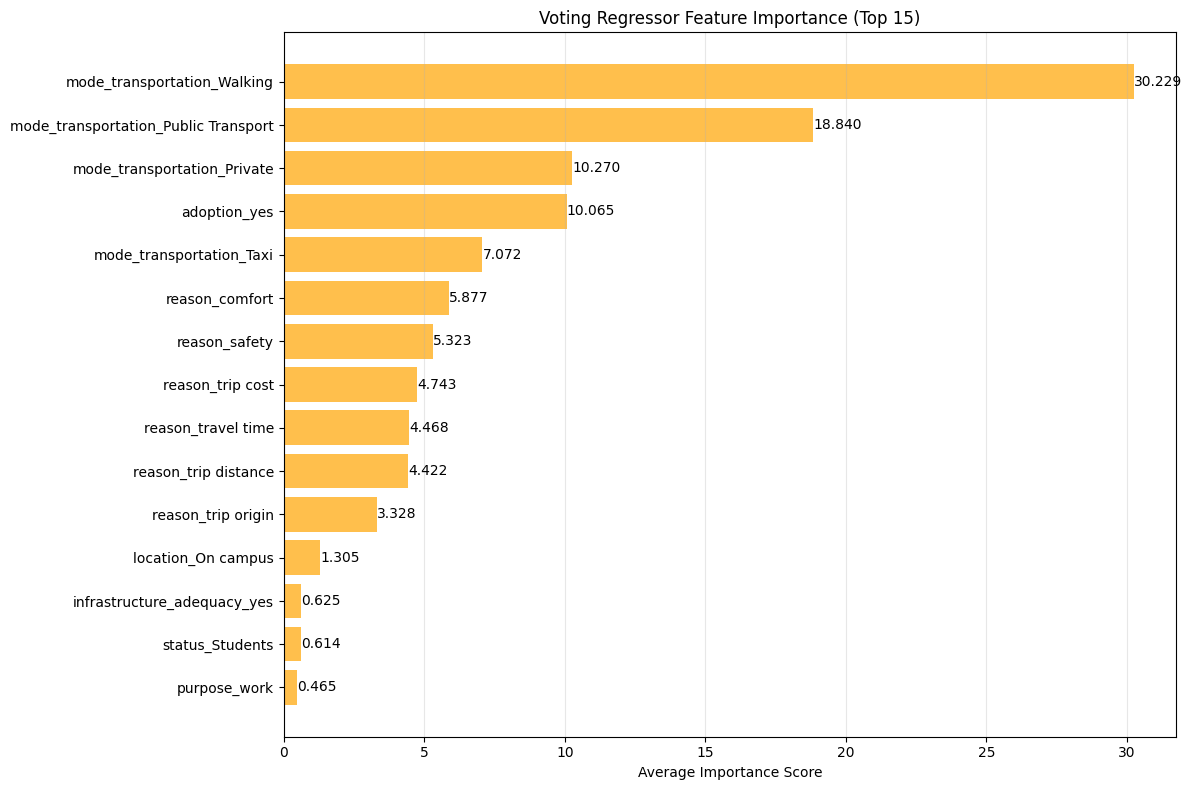

In [39]:
feature_names=X.columns
votingplot=plot_voting_regressor_feature_importance(voting_reg,feature_names)

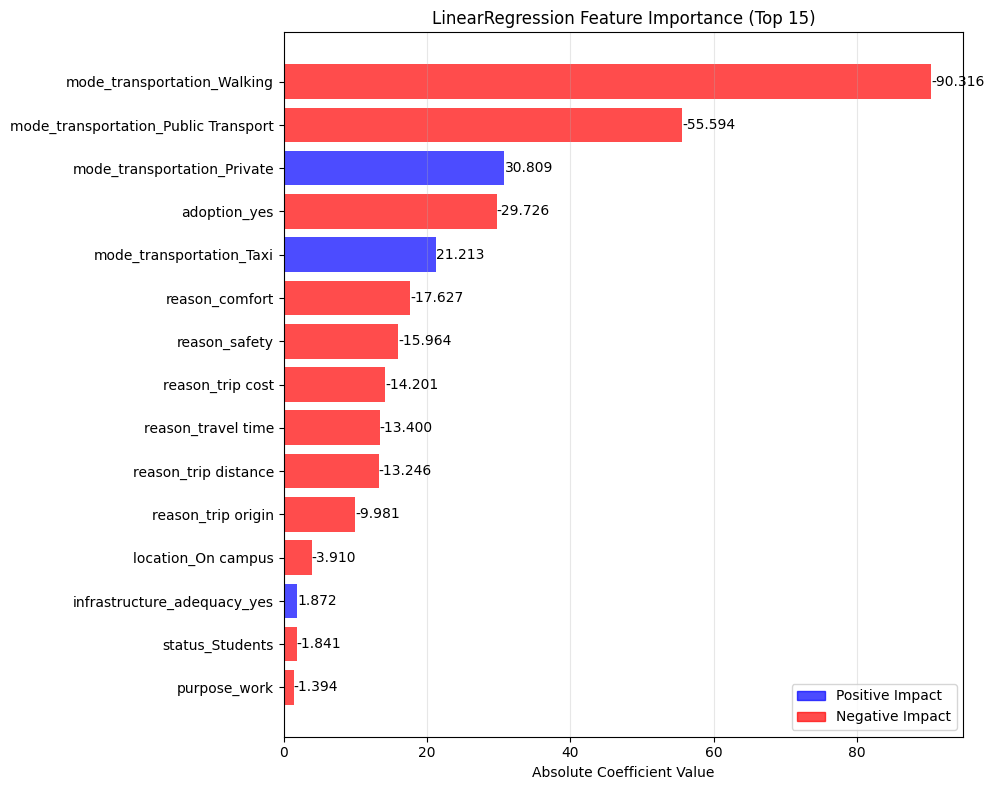

In [40]:
feature_names=X.columns
regressionplot=plot_linear_feature_importance(lrmodel, feature_names)

# Notebook Summary — Emissions & Carpool Adoption Analysis

## Objective
- Simulate and analyze the effect of carpool adoption on per-trip emissions.
- Predict adjusted emissions and identify features associated with emission reductions.

## Data Source
- Loaded simulated dataset: `../simulated_carpool_data.csv` (N = 2000 rows).
- Saved encoded dataset to `../dataset_encoded.csv`.

## Preprocessing & Transformations
- Converted categorical ranges into numeric simulations:
    - `travel_distance` → `travel_distance_exp` via random integers in specified bands.
    - `age` → `age_exp` with age ranges sampled as integers.
    - `income` → `income_exp` through randomized integer mapping per bracket.
- Converted `mode_transportation` → `emissions_exp` using per-mode random emissions:
    - Private, Taxi, Motorcycle, Public Transport (scaled), Walking (0).
- One-hot encoded categorical features: `gender`, `status`, `location`, `mode_transportation`, `purpose`, `infrastructure_adequacy`, `adoption` (with `drop_first=True`).
- Converted `trip_frequency` values to numeric (Daily → 7, etc).
- Created `adjusted_emissions`: if `adoption_yes == True`, simulated emissions reduced by using a random taxi emission divided by 3; otherwise used `emissions_exp`.
- Constructed features (`X`) and target (`y` = `adjusted_emissions`) while dropping irrelevant columns: `['emissions_exp','id','age','income','travel_distance','adjusted_emissions','trip_cost','g_per_km']`.
- Train-test split: 80% train / 20% test stratified by `adoption_yes` to preserve adoption rates.

## Models Trained
- Linear Regression (lrmodel).
- Voting Regressor combining:
    - LinearRegression, DecisionTreeRegressor, RandomForestRegressor, SVR.

## Evaluation Metrics (Linear Regression)
- MSE: 403.07
- RMSE: ~20.08
- MAE: ~15.19
- R²: ~0.836 (model explains ~83.6% of variance in adjusted emissions)

## Feature Importances & Key Findings
- Top predictors (both models) based on feature importance:
    1. mode_transportation_Walking — largest negative effect (strong emission reduction).
    2. mode_transportation_Public Transport — strong negative effect.
    3. adoption_yes — significant negative coefficient (~ -27.84), supporting hypothesis that adoption reduces emissions.
    4. mode_transportation_Taxi & mode_transportation_Private — positive predictors of emissions.
- Most numeric features (travel_distance_exp, age_exp, income_exp) had small coefficients and lower relative importance.
- Trip frequency had a small negative coefficient (slight reduction per unit in the linear model, but minor importance overall).

## Interpretations
- Walking and public transport correspond to much lower per-trip emissions (as expected).
- `adoption_yes` is associated with a meaningful emission reduction in the simulated data.
- The models achieve strong explanatory power (R² ~ 0.836); however, the dataset is artificially randomized (mappings used are random samples), so real-world interpretation should be cautious.

## Dataset & Modeling Assumptions / Limitations
- Many numeric columns were simulated using random integers per category — this is synthetic and may not reflect real distributions.
- The `adjusted_emissions` reduction for adopters is simulated by dividing a taxi emission by 3 for a subset of adopters — this is an assumption rather than empirically derived.
- Emissions mapping for public transport uses scaled ranges that differ from realistic values.
- Randomness is used in mapping: results will vary unless seeds are fixed.
- No hyperparameter tuning or cross-validation was applied to ensemble models; the VotingRegressor uses base estimators with default params.

## Recommendations & Next Steps
- Replace random mappings with empirically measured distributions or domain-informed statistics.
- Validate assumptions on adoption emissions reductions with domain experts or real data.
- Perform cross-validation and hyperparameter tuning (GridSearchCV/RandomizedSearchCV) for the RandomForest and SVR components.
- Add interactions and polynomial features if nonlinear effects are expected.
- Compare per-person and per-year emissions impact (aggregate over frequency).
- Compute and visualize residuals, prediction vs. actual scatter, and calibration plots.
- Consider models that quantify uncertainty and perform ablation studies for policy recommendations.

## Visualizations Already Included
- Bar charts for:
    - Linear regression coefficients by absolute value with sign (color-coded).
    - Voting regressor averaged feature importances.

## Conclusion
- Within the simulated dataset, carpool adoption and active transport modes (walking, public transport) show meaningful emission reductions.
- Findings support the hypothesis that carpooling (adoption) can reduce per-trip emissions, but confirmatory analysis with real-world data and improved assumptions is required to apply conclusions for policy.